# Linear regression

We recall one of the most basic models in machine learning: linear regression. We apply it to the problem of predicting the price of a house.

We use the dataset available on [Kaggle](https://www.kaggle.com/datasets/kirbysasuke/house-price-prediction-simplified-for-regression). Its format is a CSV file. We load it as a `DataFrame` using the `pandas` library.

In [261]:
import pandas as pd

In [262]:
data = pd.read_csv('../datasets/Real_Estate.csv')

In [263]:
data

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


In [264]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


We can display the distribution of each column in the dataset.

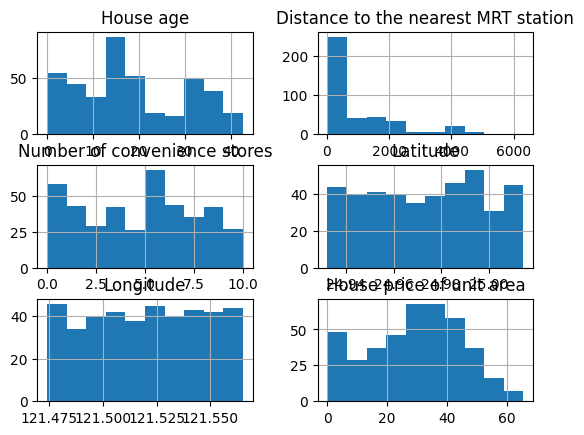

In [265]:
_ = data.hist()

We have a dataset with 414 observations and 7 columns. We will do a simple linear regression using the following features:
- `House age` -> $X_0$
- `Distance to the nearest MRT station` -> $X_1$
- `Number of convenience stores` -> $X_2$
- `Latitude` -> $X_3$
- `Longitude` -> $X_4$
  
trying to predict the
- `House price of unit area` -> $Y$

We want to predict the `House price of unit area` based on the other features with a linear model, _i.e._, a prediction based on the ansatz
$$
Y \approx w_0 X_0 + w_1 X_1 + w_2 X_2 + w_3 X_3 + w_4 X_4 + b. 
$$
The objective is to find "good" values for the weights $w_0, w_1, w_2, w_3, w_4$ and the bias $b$, exploiting the available data.

We recall how linear regression works. We have some observed realizations of the features $X_0, X_1, \dots, X_{M-1}$ (here $M=5$) and the target $Y$, _i.e._, we have a dataset $\{(x_{i}, y_{i})\}_{i=0, \ldots, N-1}$ (here $N=332$) where $x_i = (x_{i0}, x_{i1}, \dots, x_{i,M-1}) \in \mathbb{R}^{1\times M}$ and $y_i \in \mathbb{R}$ are the features and the target of the $i$-th observation, respectively. We can think of the features as input data and they can be summarized in a matrix $x \in \mathbb{R}^{N\times M}$ and the target as a vector $y \in \mathbb{R}^{N\times 1}$. 

The linear regression model can be written compactly as
$$
f(X;w,b) = Xw + b,
$$
where $X = (X_0, X_1, \dots, X_{M-1}) \in \mathbb{R}^{1 \times M}$ is the random feature vector, $w \in \mathbb{R}^{M\times 1}$ is the weights vector, and $b \in \mathbb{R}$ is the bias. The objective is to find the weights $w$ and the bias $b$ that minimize the mean squared error (MSE) between the predictions and the real target, _i.e._, 
$$
\min_{\substack{w \in \mathbb{R}^{M \times 1} \\ \ b \in \mathbb{R}}} L(w,b;\{(x_i,y_i)\}_{i=0,\dots,N-1})\, , \  \quad \text{where } L(w,b;\{(x_i,y_i)\}_{i=0,\dots,N-1}) = \frac{1}{N} \sum_{i=0}^{N-1} (x_i w + b - y_i)^2.
$$

We will use the `torch` library to work with tensors and perform linear algebra operations.

In [266]:
import torch

Let us reorganize the dataset by selecting the features and the target. 

In [267]:
features = ['House age', 'Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
data[features] 

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude
0,13.3,4082.01500,8,25.007059,121.561694
1,35.5,274.01440,2,25.012148,121.546990
2,1.1,1978.67100,10,25.003850,121.528336
3,22.2,1055.06700,5,24.962887,121.482178
4,8.5,967.40000,6,25.011037,121.479946
...,...,...,...,...,...
409,18.3,170.12890,6,24.981186,121.486798
410,11.9,323.69120,2,24.950070,121.483918
411,0.0,451.64190,8,24.963901,121.543387
412,35.9,292.99780,5,24.997863,121.558286


We need a way to measure how good is the model on unseen data. A simple way to do this is to split the dataset into a training set and a test set. The best parameters of the model are found by minimizing the loss function on the training set. The test set is used to evaluate the model's performance on unseen data.

A common way to split the dataset is to use 80% of the data for training and 20% for testing. 

In [268]:
n_training_samples = int(len(data)*0.8)
print(n_training_samples)

331


To ensure that the data is split randomly, we shuffle the dataset before splitting it.

In [269]:
permuted_indices = torch.randperm(len(data))
training_indices = permuted_indices[:n_training_samples]
test_indices = permuted_indices[n_training_samples:]

Now we define the tensors for the features and the target for the training and test sets.

In [270]:
x_train = torch.tensor(data[features].iloc[training_indices].values, dtype=torch.float32)
y_train = torch.tensor(data['House price of unit area'].iloc[training_indices].values, dtype=torch.float32).view(n_training_samples,1) # we convert the training labels into a tensor
x_test = torch.tensor(data[features].iloc[test_indices].values, dtype=torch.float32) # we convert the test features into a tensor
y_test = torch.tensor(data['House price of unit area'].iloc[test_indices].values, dtype=torch.float32).view(len(test_indices),1) # we convert the test labels into a tensor
x_train.shape, y_train.shape, x_test.shape, y_test.shape

(torch.Size([331, 5]),
 torch.Size([331, 1]),
 torch.Size([83, 5]),
 torch.Size([83, 1]))

We can visually inspect the data by plotting the features against the target. To do this, we use the `matplotlib` library.

In [271]:
import matplotlib.pyplot as plt 

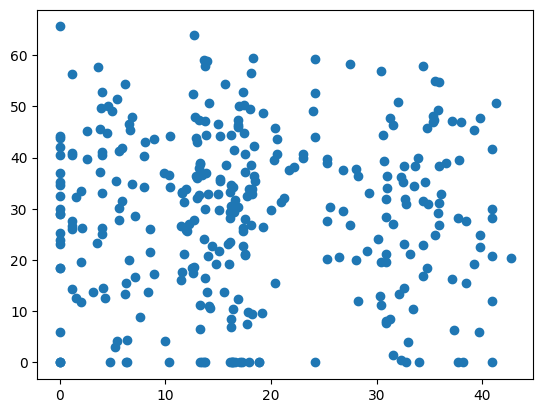

In [272]:
fig = plt.figure()
ax = fig.add_subplot(111)
j = 0 # changing this value will change the feature that is plotted on the x-axis
ax.scatter(x_train[:,0], y_train) 

In the lecture we saw how to find the optimal weights and bias by solving a linear system of equations. In the following, we compute the matrix and the vector that define the linear system of equations.

In [273]:
x_tilde = torch.cat((x_train, torch.ones(n_training_samples,1)), dim=1)
x_tilde.shape

torch.Size([331, 6])

In [274]:
A = 1/n_training_samples * x_tilde.t() @ x_tilde
c = 1/n_training_samples * x_tilde.t() @ y_train

In [275]:
A.shape, c.shape

(torch.Size([6, 6]), torch.Size([6, 1]))

We can solve the linear system of equations using the `torch` library.

In [276]:
solution = torch.linalg.solve(A,c)
w = solution[:-1]
b = solution[-1]
w, b

(tensor([[-9.3098e-03],
         [-8.8339e-03],
         [ 1.7870e+00],
         [ 3.8130e+01],
         [-8.1721e+01]]),
 tensor([9009.8340]))

Here we have an example of prediction on the first observation of the test set.

In [277]:
x_test[0] @ w + b

tensor([5.8701])

We recall the definition of coefficient of determination $R^2$:
$$
R^2 = 1 - \frac{\sum_{i=0}^{N-1} (y_i - f(x_i;w,b))^2}{\sum_{i=0}^{N-1} (y_i - \bar{y})^2} \, ,
$$
where $\bar{y} = \frac{1}{N} \sum_{i=0}^{N-1} y_i$ is the mean of the target values. The coefficient of determination is a measure of how well the model performs compared to the mean of the target values. It is a number between 0 and 1. The closer to 1, the better the model. Let us compute it for the test set.

In [278]:
R2 = 1 - torch.sum((y_train - x_train @ w - b)**2) / torch.sum((y_train - y_train.mean())**2)
print(f'R2 on train set: {R2}')
R2 = 1 - torch.sum((y_test - x_test @ w - b)**2) / torch.sum((y_test - y_test.mean())**2)
print(f'R2 on test set: {R2}')

R2 on train set: 0.5143718719482422
R2 on test set: 0.5123792290687561
